# 앙상블

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.6 앙상블(ensemble)

## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## 결정 트리의 앙상블

### ENS-Q1. 랜덤 포레스트의 특성을 확인하세요.
- 샘플이 100개이고,가우스 노이즈는 0.25인 0/1로 구성된 데이터를 make_moons를 사용해서 작성하세요.
- 분류 특성을 고려해서 학습 데이터와 테스트 데이터를 분리하세요.
- 랜덤 포레스트(RandomForestClassifier)를 사용하고, 분류기는 5개로 지정하여 객체를 생성하세요.
- 학습을 진행하세요.

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X, y = make_moons(n_samples=100, noise=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=42)

### ENS-Q2. 랜덤 포레스트의 특성을 시각적으로 확인하세요.
- 2X3 서브 그래프를 작성합니다.
- 개별 분류기 5개와 최종 분류기 1개를 시각적으로 표현하세요.
- mglearn 패키지의 plot_tree_partition() 함수를 활용하세요.

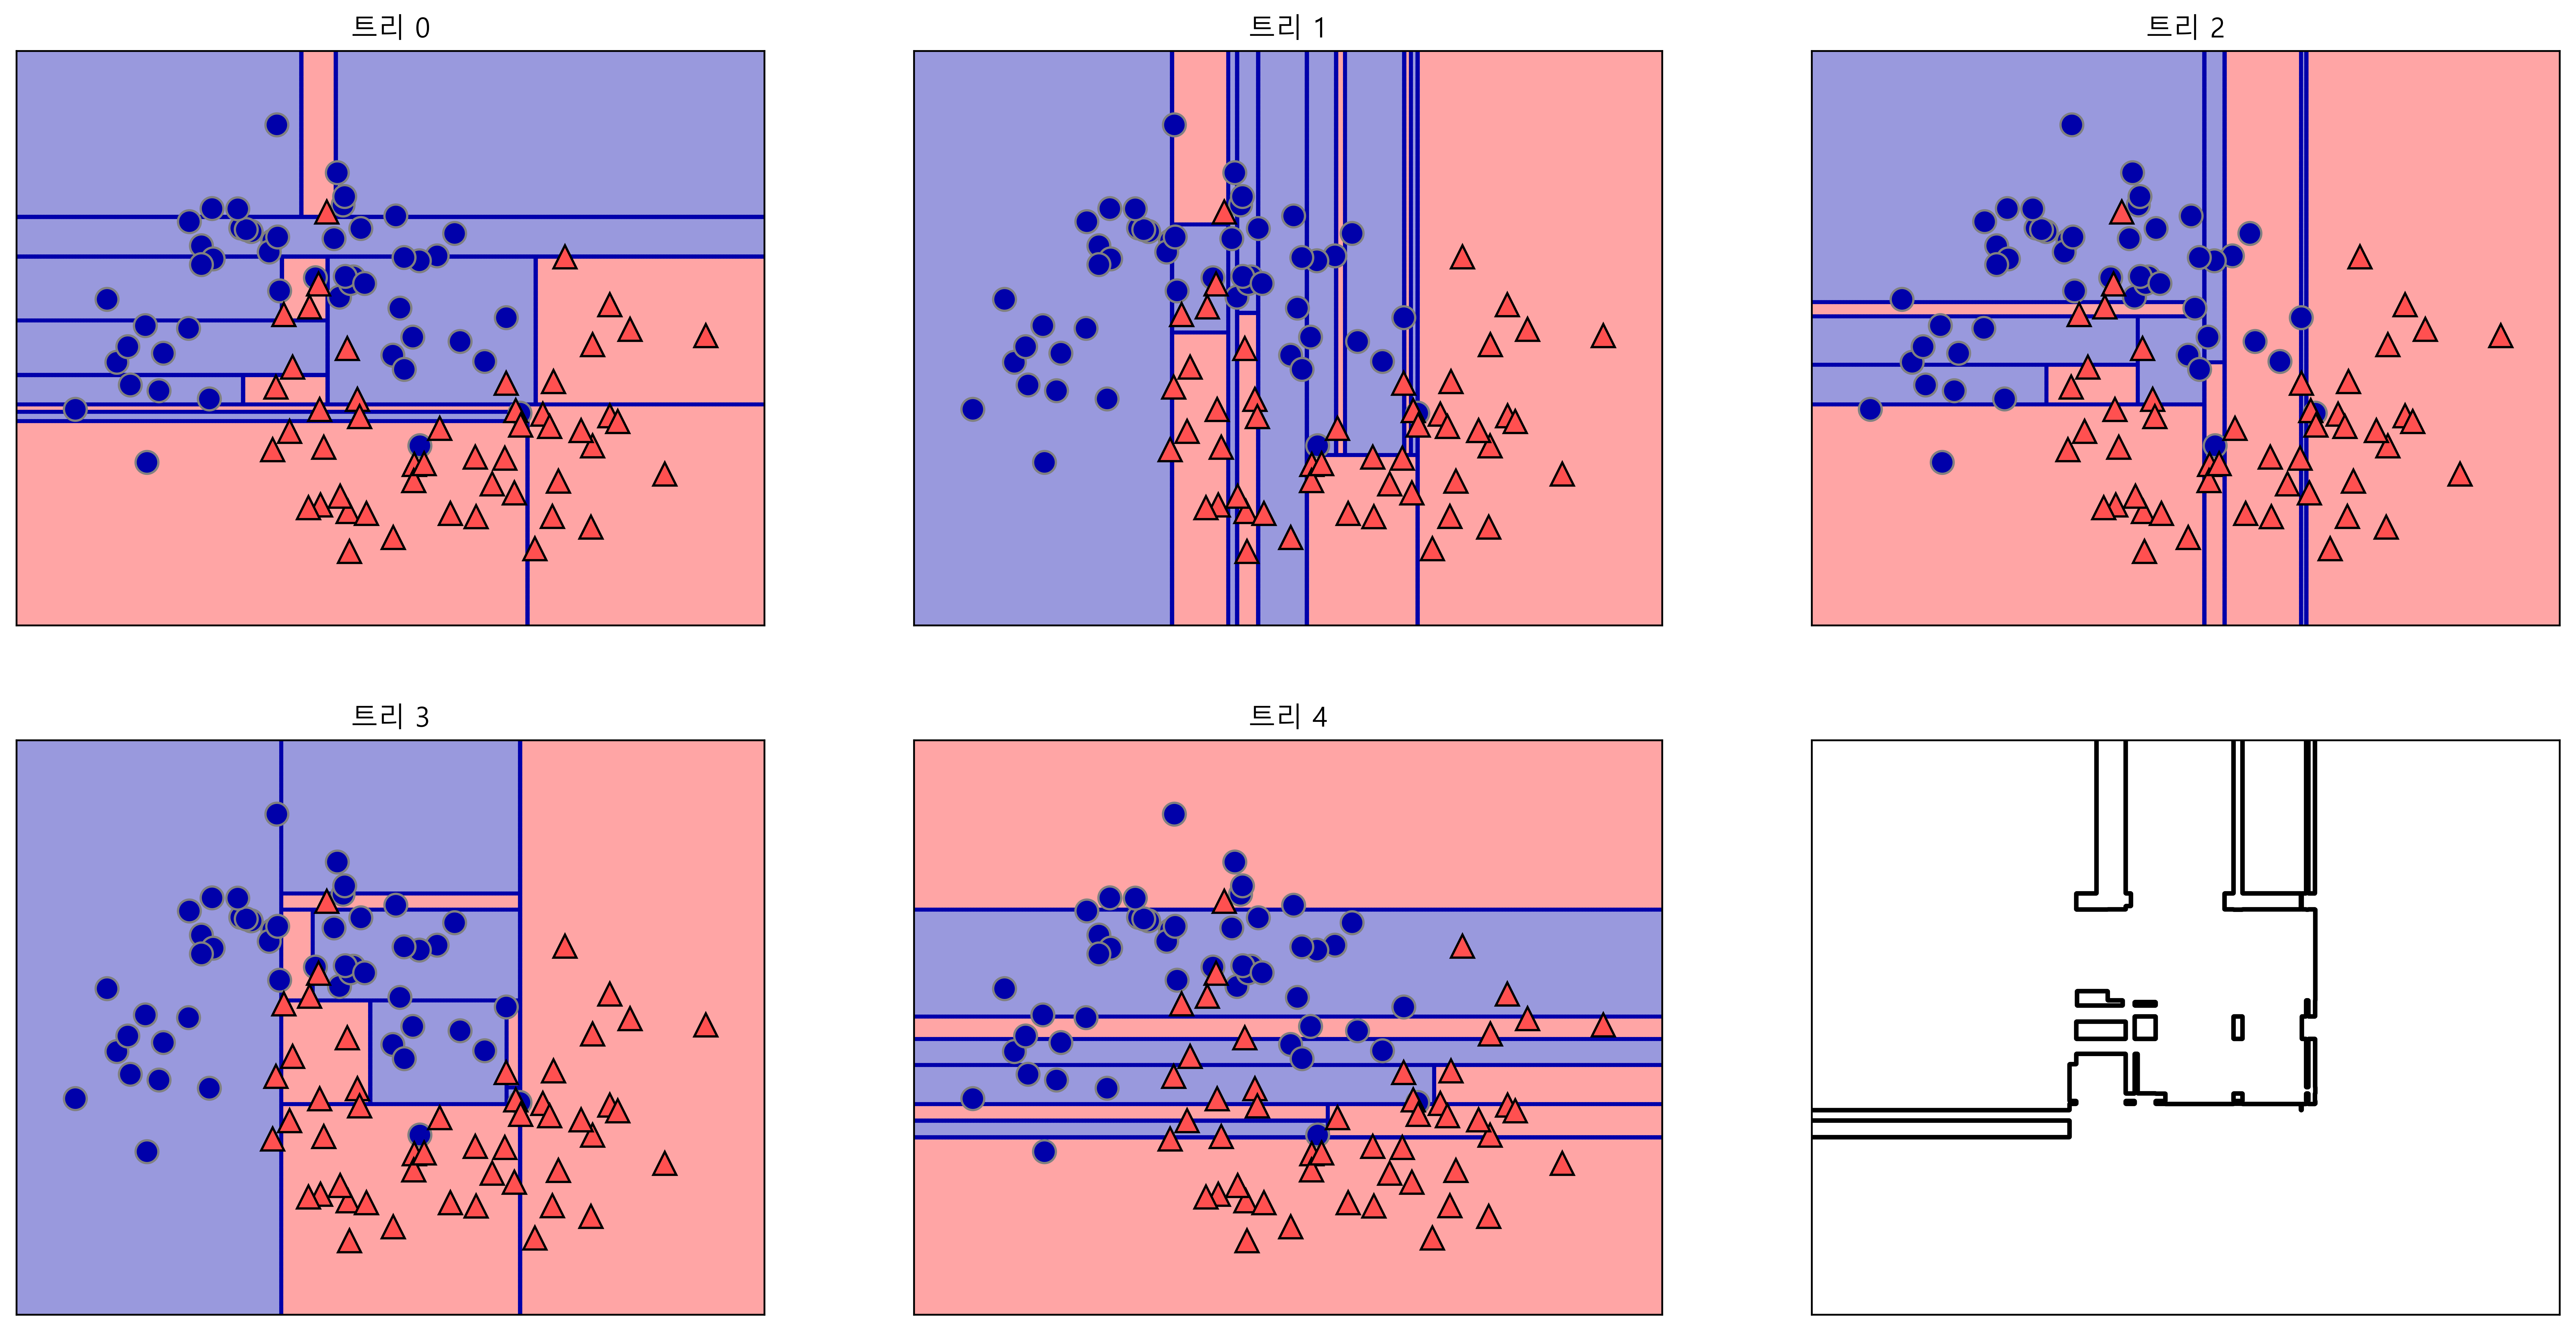

In [11]:
# 가장 실용적인 코드 !!
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title(f"트리 {i}")
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, ax=axes[-1, -1])



### ENS-Q3. 랜덤 포레스트를 활용하여 분류 문제를 해결하세요.
- 랜덤 포레스트를 활용하여 기존의 유방암 데이터를 분석하세요.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)

forest.fit(X_train, y_train)

y_pred=forest.predict(X_test)
print(forest.score(X_train, y_train))
print(accuracy_score(y_pred, y_test))

1.0
0.958041958041958


### ENS-Q4. 랜덤 포레스트의 중요도를 그래프로 표현하세요.
- 랜덤 포레스트를 활용하여 기존의 유방암 데이터를 분석하세요.

### ENS-Q5. 그래디언트부스팅 분류기를 활용한 분류 문제를 해결하세요.

### ENS-Q6. 그래디언트부스팅 분류기의 제약 조건을 추가하세요.

### ENS-Q7. 그래디언트부스팅 분류기의 lr 제약 조건을 추가하세요.

### ENS-Q8. 그래디언트부스팅의 중요도를 그래프로 표현하세요.

## 파이썬 머신러닝 수업

### 외부 라이브러리 설치
pip install 라이브러리명
pip install pandas scikit-learn seaborn graphviz

### matplotlib 라이브러리 폰트 설정
matplotlib.rc("font", family="Malgun Gothic") # 윈도우
matplotlib.rcParams["axes.unicode_minus"] = False #  마이너스 기호가 깨지는 문제를 해결하기 위한 설정

### 설치되어있는 외부 라이브러리 리스트 출력
pip list

### 외부 라이브러리 업데이트
pip install -U 라이브러리명

### 외부 라이브러리 버전 맞추기
pip install 라이브러리명==원하는_버전_번호

### Bunch.keys( )
data: 샘플 데이터 (NumPy 배열)
target: 레이블 데이터 (NumPy 배열)
feature_names: 특성 이름 목록
target_names: 레이블 이름 목록
DESCR: 데이터셋 설명
filename: 데이터셋 파일 저장 위치


### (데이터 모델 학습 및 모델 성능평가 과정)
### 1. 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### 2. 학습 데이터 및 테스트 데이터 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

### 3. 모델 객체 생성
dt = DecisionTreeClassifier(random_state=42)

### 4. 모델 학습
dt.fit(X_train, y_train)

### 5. 모델 성능 평가
print(f"훈련 정확도 : {dt.score(X_train, y_train)}") # 훈련 정확도
print(f"테스트 정확도 : {dt.score(X_test, y_test)}") # 테스트 정확도 

### (분류 문제를 개선)
### 트리의 최대 높이를 4로 제한
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

### 결정트리 시각화
from sklearn.tree import export_graphviz
export_graphviz(dt,   
                out_file="dt.dot",  
                class_names=["F","T"], 
                feature_names=cancer.feature_names)


### matplotlib를 사용해서 `dot` 파일을 출력
import graphviz
with open("dt.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

### scikit-learn에서 제공하는 `plot_tree` 함수를 활용
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(dt,class_names=["악성","양성"],  
          feature_names=cancer.feature_names, 
          filled=True)
plt.show()

### 트리의 특성 중요도 파악 (막대, 스케터(단위 관계), 선)
dt.feature_importances_

### 함수 정의 절차 
1. 함수 이름(메서드 이름) 정의 (카멜 표기법, 스네이크 등등)
2. 매개변수 설정 * 매개변수는 없는것이 좋다.
3. 반환값 설정 * 반환값은 무조건 있어야 한다.

### 기초 통계 출력
- pandas로 변환하라는 말이다.
1. x = pd.DataFrame(iris.data, columns=iris.feature_names)
2. x.describe()

### predict 메서드
- 결정 트리 모델이 X_test 데이터를 입력으로 받아 각 샘플에 대한 예측을 수행하는 메서드

### classification_report
- Precision (정밀도),  Recall (재현율)

### tree 시각화
1. from sklearn.tree import plot_tree
2. plot_tree(dt)
3. plt.show()
- 어떤 방향으로 가는지 이해하기 어렵다.

from sklearn.tree import plot_tree
plot_tree(dt, 
          feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()
print(dt.feature_importances_) # 중요도 출력

# 결정트리에서는 중요도가 뒤로 갈 수록 중요하다.
# 결정트리에서의 문제점은 과대적합되는 것이다. 
해결방법 : (매개변수를 이용하여 높이를 제한한다.)

### make_moons
- 두 개의 클래스(반달 모양)를 생성하며, 각 클래스는 2차원 공간에 위치
- 비선형 경계가 있는 분류 문제를 시뮬레이션하는 데 적합하다.

### accuracy_score
- 특정 레이블(또는 클래스) 분포를 유지하도록 도와주는 매개변수

### RandomForest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

# 파이썬에서 할 줄 알아야 하는 것
1. 함수 만들기 - > def 함수명() :
2. 함수 사용하는 방법 - > 함수명( )
- 메서드의 필수 옵션을 잘 알고 있어야 한다.
# 파이썬 슬라이싱 조심해야 한다.

## 포화성이 8:2 정도되면 편향된 데이터가 된다.

### 랜덤 포레스트 시각화
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title(f"트리 {i}")
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

### 랜덤 포레스트 분류 문제 해결 절차
# 1. 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 2. 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target,random_state=42)

# 3. 분류기를 생성
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)

# 4. 분류기를 학습
forest.fit(X_train, y_train)

# 5. 예측 및 측정
from sklearn.metrics import accuracy_score
y_pred=forest.predict(X_test)
print(forest.score(X_train, y_train))
print(accuracy_score(y_pred, y_test))
